# 2D Fourier transform


It is an extension of the 1D Fourier transform of signals defined in 2D:

$$F_{k_x, k_y} = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}{f(x,y)\cdot e^{-i2\pi({k_x x/M} + k_y y/N)}}$$


The inverse 2D Fourier transform becomes:

$$f_{x, y} = \frac{1}{MN}\sum_{k_x=0}^{M-1}\sum_{k_y=0}^{N-1}{F(k_x,k_y)\cdot e^{i2\pi({k_x x/M} + k_y y/N)}}$$


To find the characteristic temporal or spatial frequencies of 2D signals, we can use the 2D FFT function included in numpy (np.fft.fft2).


https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html


## Example 1: 

Given the matrix signal_2D, defined as:

\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}

Calculate its 2D DFT.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
signal_2D = np.array([[1, 2],[3, 4]])

print(signal_2D)

[[1 2]
 [3 4]]


In [3]:
fourier_2D = np.fft.fft2(signal_2D)

print(fourier_2D)

[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]


## Example 2: 

Given the matrix signal_2D, defined as:

$f(x, y) = sin(\alpha x)$

Calculate its 2D FFT.

In [4]:
def function_2D(x, y, alpha):
    return np.sin(alpha*x)

In [5]:
d_spacing = 0.001

x = np.arange(0, 1, d_spacing)

y = np.arange(0, 1, d_spacing)

alpha = 10*np.pi  # nu is = 5Hz  or = 5m^-1

X, Y = np.meshgrid(x, y)

Z_f = function_2D(X, Y, alpha)

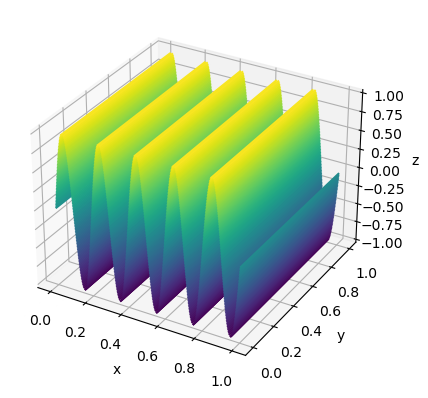

In [6]:
# Now we do some plotting:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

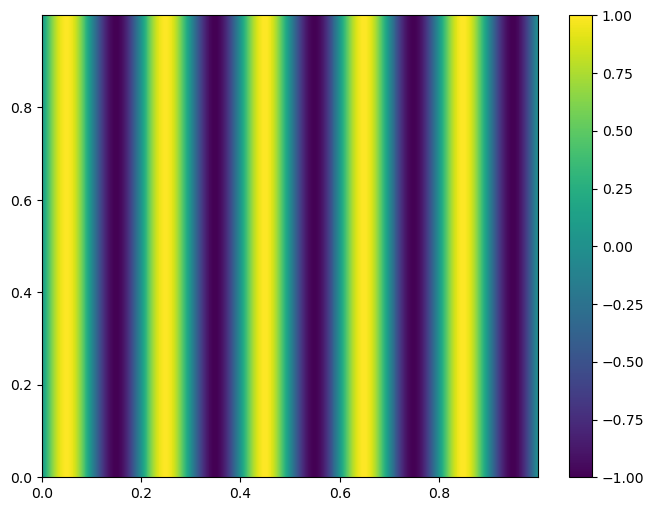

In [7]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(X, Y, Z_f, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

### Fourier transform in 2D

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html

In [8]:
print(Z_f.shape)

(1000, 1000)


In [9]:
# Unshifted Fourier signal

fourier_Z_f = np.fft.fft2(Z_f)

# Shifted signal:

shifted_fourier_Z_f = np.fft.fftshift(fourier_Z_f)

print(fourier_Z_f.shape)

# Norms

norm_fourier_Z_f = np.abs(fourier_Z_f)
norm_shifted_Z_f = np.abs(shifted_fourier_Z_f)

(1000, 1000)


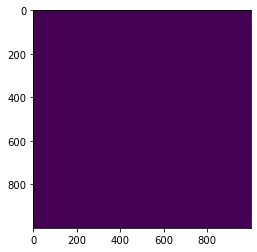

In [10]:
# Plotting Fourier image:

%matplotlib inline

plt.imshow(np.abs(fourier_Z_f))

### Spatial Frequencies:

https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

In [11]:
freqs_x = np.fft.fftfreq(Z_f.shape[0], d=d_spacing)

freqs_y = np.fft.fftfreq(Z_f.shape[1], d=d_spacing)

#print(freqs_x)

# Creating mesh:

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

### Fourier image on the frequency mesh:

### Unshifted Fourier signal:

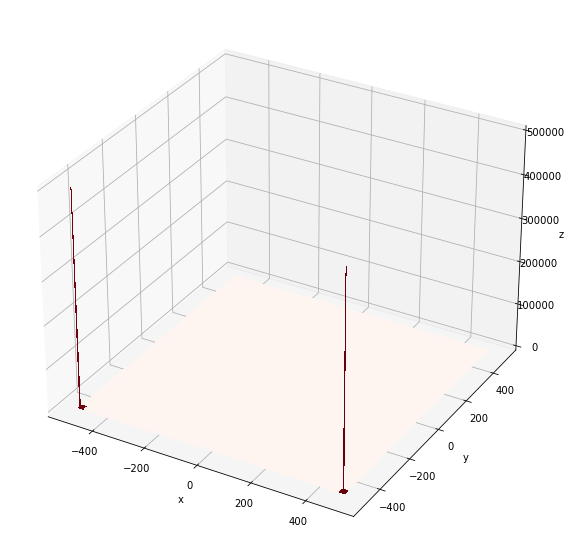

In [12]:
# Now we do some plotting:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, norm_fourier_Z_f, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Shifted Fourier transform:

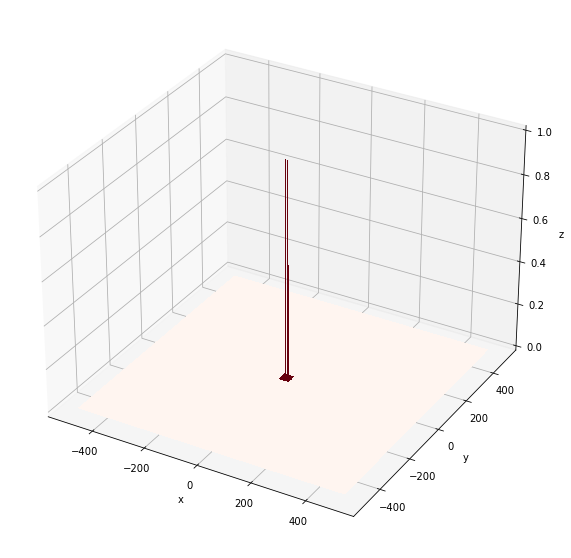

In [28]:
# Now we do some plotting:
fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, (2/norm_shifted_Z_f.size)*norm_shifted_Z_f, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## 2D projection of the Fourier transform:

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


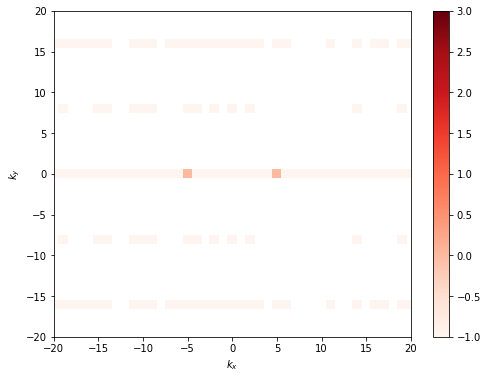

In [29]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f) , shading='auto', cmap = "Reds", vmin = -1, vmax= 3)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.colorbar(Z1)

plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")

plt.show()

In [32]:
slice_ky0 = np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[500,:]

slice_ky0_2 = ((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[500,:]

print(slice_ky0.shape)

(1000,)


/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(-20.0, 20.0)

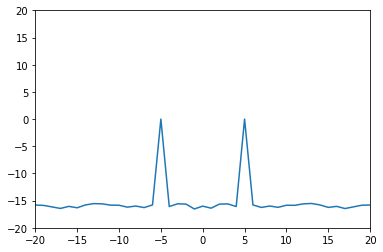

In [31]:
%matplotlib inline

plt.plot(sorted(freqs_x),slice_ky0)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

(0.0, 2.0)

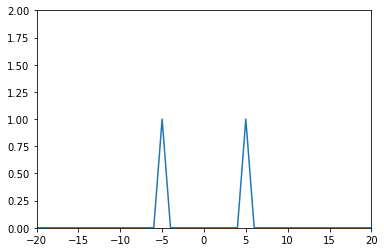

In [34]:
%matplotlib inline

plt.plot(sorted(freqs_x),slice_ky0_2)

plt.xlim(-20, 20)
plt.ylim(0, 2)